In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import glob
import re
import os

0
10
20
50
100
200


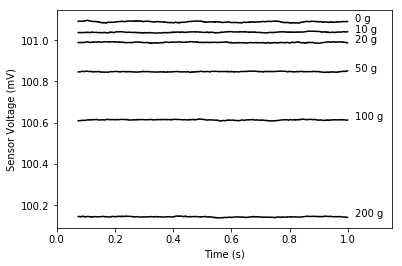

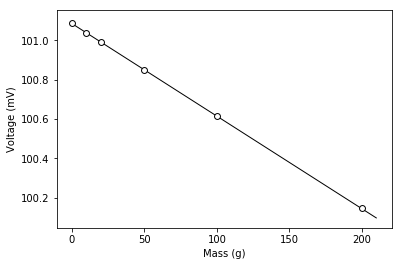

In [99]:
sample_rate = 1000 # Hz

x = []
y = []

for file in ['calibraton_0_g.lvm', 
             'calibraton_10_g.lvm', 
             'calibraton_20_g.lvm', 
             'calibraton_50_g.lvm', 
             'calibraton_100_g.lvm',
             'calibraton_200_g.lvm']:
    df = pd.read_csv(file, skiprows=22, delimiter='\t')
    df.columns = ['T', 'V', 'COMMENT']
    df = df.drop(['COMMENT'], axis=1)
    df['T'] = df['T']
    
    value, = re.search(r'(\d{1,3})', file).groups()
    print(value)

    plt.plot(df['T'], df['V'].rolling(75).mean() * 1000.0, c='k')
    plt.text(1.025, df['V'].mean() * 1000, value + ' g')
    
    x.append(float(value))
    y.append(df['V'].mean() * 1000)

plt.xlabel('Time (s)')
plt.ylabel('Sensor Voltage (mV)')
plt.xlim((0, 1.15))
    
plt.show()


plt.scatter(x, y, c='w', edgecolor='k', s=35)

m, b = np.polyfit(x, y, 1)

xs = np.linspace(0, 210, 1000)
ys = m * xs + b

plt.plot(xs, ys, color='k', linewidth=1, zorder=0)
plt.ylabel('Voltage (mV)')
plt.xlabel('Mass (g)')
plt.show()

